In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
np.random.seed(1232)
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\dep')
data = pd.read_csv("Rand_train.csv", sep=',')
data_val = pd.read_csv("Rand_valid.csv", sep=',')

In [3]:
data.cost = (np.exp(data.cost) - 0.5)*((data.cost != 0) * 1)
data_val.cost = (np.exp(data_val.cost) - 0.5)*((data_val.cost != 0) * 1)
data = shuffle(data).reset_index(drop=True)
data = data.drop(['fmde', 'lxghindx', 'lpi'], axis=1)
data_val = data_val.drop(['fmde', 'lxghindx', 'lpi'], axis=1)

In [4]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]
X_val = data_val.iloc[:,1:]
Y_val = data_val.iloc[:,0]

ranking = np.load('ranking.npy')

my_index = X.columns.values[ranking]
X2 = X[my_index]
X2_val = X_val[my_index]

In [5]:
cut = 0
y1 = (Y <= cut) * 1
y2 = (Y > cut) * (-1) * (-Y)
Y2 = np.stack((y1, y2), axis=-1)

y1_val = (Y_val <= cut) * 1
y2_val = (Y_val > cut) * (-1) * (-Y_val)
Y2_val = np.stack((y1_val, y2_val), axis=-1)

In [6]:
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\prog_calc')
from fit3_nn import fit

In [7]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        
        self.fc11 = nn.Linear(16, 24)
        self.fc12 = nn.Linear(24, 1)
        
        self.fc21 = nn.Linear(16, 24)
        self.fc22 = nn.Linear(24, 5)
        self.fc23 = nn.Linear(5, 1)
                
    def forward(self, x):
        x1 = torch.tanh(self.fc11(x))
        x1 = torch.sigmoid(self.fc12(x1))
        
        x2 = self.fc21(x)
        x2 = F.relu(self.fc22(x2))
        x2 = torch.exp(self.fc23(x2))       
        
        x3 = torch.stack((x1[:,0], x2[:,0]), dim=1)       
        return x3

In [8]:
def comb_error(output, target):
    output = (output + 0.0001)*0.999
    logErr1 = -1 * torch.log(output) * target[:,0].view(1,-1).t()
    logErr2 = -1 * torch.log(1 - output) * (1 - target[:,0].view(1,-1)).t()
    mseErr = torch.pow(target - output, 2) * (1 - target[:,0].view(1,-1)).t()
    return (1/output.shape[0]) * (torch.sum(logErr1,dim=0)[0] + torch.sum(logErr2,dim=0)[0] + (1/(2*950000))*torch.sum(mseErr,dim=0)[1])

In [9]:
n_epochs = 5000
lr = 0.001
verbose = 1
n_batches = 6
batch_to_avg = 2
clipping = 0.20
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining6.pt'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
net = Net1()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

#PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining6.pt'
#net.load_state_dict(torch.load(PATH, map_location = device))
    
a, b, c = fit(X2, X2_val, Y2, Y2_val, net, optimizer, comb_error, n_epochs, 
                    n_batches, batch_to_avg, lr, clipping, PATH, device, verbose)   
   

Epoch 1: Training Loss: 1.5693419774373372, Validation Loss: 1.7081111669540405
New Checkpoint Saved into PATH
Epoch 2: Training Loss: 1.5648074746131897, Validation Loss: 1.7010189294815063
New Checkpoint Saved into PATH
Epoch 3: Training Loss: 1.5569361448287964, Validation Loss: 1.691163420677185
New Checkpoint Saved into PATH
Epoch 4: Training Loss: 1.5465574661890666, Validation Loss: 1.6793315410614014
New Checkpoint Saved into PATH
Epoch 5: Training Loss: 1.5345000425974529, Validation Loss: 1.6661027669906616
New Checkpoint Saved into PATH
Epoch 6: Training Loss: 1.5213073293368022, Validation Loss: 1.6518977880477905
New Checkpoint Saved into PATH
Epoch 7: Training Loss: 1.5072665214538574, Validation Loss: 1.6370285749435425
New Checkpoint Saved into PATH
Epoch 8: Training Loss: 1.4928038120269775, Validation Loss: 1.6217246055603027
New Checkpoint Saved into PATH
Epoch 9: Training Loss: 1.4778270324071248, Validation Loss: 1.6061515808105469
New Checkpoint Saved into PATH
Ep

Epoch 75: Training Loss: 0.9228234787782034, Validation Loss: 1.0296921730041504
New Checkpoint Saved into PATH
Epoch 76: Training Loss: 0.9211713771025339, Validation Loss: 1.0281219482421875
New Checkpoint Saved into PATH
Epoch 77: Training Loss: 0.9197266399860382, Validation Loss: 1.026646375656128
New Checkpoint Saved into PATH
Epoch 78: Training Loss: 0.9183537165323893, Validation Loss: 1.0252563953399658
New Checkpoint Saved into PATH
Epoch 79: Training Loss: 0.9170375565687815, Validation Loss: 1.0239444971084595
New Checkpoint Saved into PATH
Epoch 80: Training Loss: 0.9158031543095907, Validation Loss: 1.0227009057998657
New Checkpoint Saved into PATH
Epoch 81: Training Loss: 0.9145932694276174, Validation Loss: 1.0215198993682861
New Checkpoint Saved into PATH
Epoch 82: Training Loss: 0.9134426514307658, Validation Loss: 1.0203880071640015
New Checkpoint Saved into PATH
Epoch 83: Training Loss: 0.9123672743638357, Validation Loss: 1.0192937850952148
New Checkpoint Saved int

Epoch 149: Training Loss: 0.864443322022756, Validation Loss: 0.9748852849006653
New Checkpoint Saved into PATH
Epoch 150: Training Loss: 0.8640798429648081, Validation Loss: 0.9745590090751648
New Checkpoint Saved into PATH
Epoch 151: Training Loss: 0.8637129366397858, Validation Loss: 0.9742579460144043
New Checkpoint Saved into PATH
Epoch 152: Training Loss: 0.8633793989817301, Validation Loss: 0.9739295244216919
New Checkpoint Saved into PATH
Epoch 153: Training Loss: 0.8630424439907074, Validation Loss: 0.9736225008964539
New Checkpoint Saved into PATH
Epoch 154: Training Loss: 0.862709770600001, Validation Loss: 0.9733052253723145
New Checkpoint Saved into PATH
Epoch 155: Training Loss: 0.8624012768268585, Validation Loss: 0.9729835987091064
New Checkpoint Saved into PATH
Epoch 156: Training Loss: 0.8621014555295309, Validation Loss: 0.9726942181587219
New Checkpoint Saved into PATH
Epoch 157: Training Loss: 0.8618162671724955, Validation Loss: 0.9723998308181763
New Checkpoint S

Epoch 223: Training Loss: 0.8552744487921397, Validation Loss: 0.96577388048172
New Checkpoint Saved into PATH
Epoch 224: Training Loss: 0.8552499612172445, Validation Loss: 0.9657626152038574
New Checkpoint Saved into PATH
Epoch 225: Training Loss: 0.8552203377087911, Validation Loss: 0.9657256007194519
New Checkpoint Saved into PATH
Epoch 226: Training Loss: 0.8551948368549347, Validation Loss: 0.9656928181648254
New Checkpoint Saved into PATH
Epoch 227: Training Loss: 0.855164517958959, Validation Loss: 0.9656509757041931
New Checkpoint Saved into PATH
Epoch 228: Training Loss: 0.855137308438619, Validation Loss: 0.9656310081481934
New Checkpoint Saved into PATH
Epoch 229: Training Loss: 0.855115681886673, Validation Loss: 0.9656104445457458
New Checkpoint Saved into PATH
Epoch 230: Training Loss: 0.8550874292850494, Validation Loss: 0.9655907154083252
New Checkpoint Saved into PATH
Epoch 231: Training Loss: 0.8550682663917542, Validation Loss: 0.9655858874320984
New Checkpoint Save

Epoch 300: Training Loss: 0.85382941365242, Validation Loss: 0.9639837741851807
New Checkpoint Saved into PATH
Epoch 301: Training Loss: 0.8538224895795187, Validation Loss: 0.963981032371521
New Checkpoint Saved into PATH
Epoch 302: Training Loss: 0.8538054327170054, Validation Loss: 0.9639214277267456
New Checkpoint Saved into PATH
Epoch 303: Training Loss: 0.8537890911102295, Validation Loss: 0.9638846516609192
New Checkpoint Saved into PATH
Epoch 304: Training Loss: 0.8537783622741699, Validation Loss: 0.9638659954071045
New Checkpoint Saved into PATH
Epoch 305: Training Loss: 0.8537627657254537, Validation Loss: 0.963869571685791
Epoch 306: Training Loss: 0.8537486692269644, Validation Loss: 0.9638363122940063
New Checkpoint Saved into PATH
Epoch 307: Training Loss: 0.8537329932053884, Validation Loss: 0.9638164043426514
New Checkpoint Saved into PATH
Epoch 308: Training Loss: 0.8537236948808035, Validation Loss: 0.9638217687606812
Epoch 309: Training Loss: 0.853713870048523, Vali

Epoch 382: Training Loss: 0.8528433938821157, Validation Loss: 0.9626408815383911
New Checkpoint Saved into PATH
Epoch 383: Training Loss: 0.8528306285540262, Validation Loss: 0.9626485705375671
Epoch 384: Training Loss: 0.8528238435586294, Validation Loss: 0.9626185297966003
New Checkpoint Saved into PATH
Epoch 385: Training Loss: 0.8528129458427429, Validation Loss: 0.9626474976539612
Epoch 386: Training Loss: 0.8527974387009939, Validation Loss: 0.962646484375
Epoch 387: Training Loss: 0.852789173523585, Validation Loss: 0.9626608490943909
Epoch 388: Training Loss: 0.852777381738027, Validation Loss: 0.9626403450965881
Epoch 389: Training Loss: 0.8527637918790182, Validation Loss: 0.9626227021217346
Epoch 390: Training Loss: 0.8527557055155436, Validation Loss: 0.9625952243804932
New Checkpoint Saved into PATH
Epoch 391: Training Loss: 0.8527422944704691, Validation Loss: 0.9625774621963501
New Checkpoint Saved into PATH
Epoch 392: Training Loss: 0.8527312775452932, Validation Loss:

Epoch 466: Training Loss: 0.8520016074180603, Validation Loss: 0.961654782295227
New Checkpoint Saved into PATH
Epoch 467: Training Loss: 0.8519805471102396, Validation Loss: 0.9616447687149048
New Checkpoint Saved into PATH
Epoch 468: Training Loss: 0.8519728680451711, Validation Loss: 0.9616367816925049
New Checkpoint Saved into PATH
Epoch 469: Training Loss: 0.851973295211792, Validation Loss: 0.9616743922233582
Epoch 470: Training Loss: 0.8519536058108012, Validation Loss: 0.9616592526435852
Epoch 471: Training Loss: 0.851944088935852, Validation Loss: 0.9616405963897705
Epoch 472: Training Loss: 0.8519345025221506, Validation Loss: 0.9616259336471558
New Checkpoint Saved into PATH
Epoch 473: Training Loss: 0.8519246478875478, Validation Loss: 0.9616047143936157
New Checkpoint Saved into PATH
Epoch 474: Training Loss: 0.8519175748030344, Validation Loss: 0.961571455001831
New Checkpoint Saved into PATH
Epoch 475: Training Loss: 0.8519054849942526, Validation Loss: 0.961567401885986

Epoch 552: Training Loss: 0.851205845673879, Validation Loss: 0.9608186483383179
Epoch 553: Training Loss: 0.8511983752250671, Validation Loss: 0.9607650637626648
New Checkpoint Saved into PATH
Epoch 554: Training Loss: 0.8511837124824524, Validation Loss: 0.9607546925544739
New Checkpoint Saved into PATH
Epoch 555: Training Loss: 0.8511770367622375, Validation Loss: 0.9607338905334473
New Checkpoint Saved into PATH
Epoch 556: Training Loss: 0.851172556479772, Validation Loss: 0.9607440829277039
Epoch 557: Training Loss: 0.8511642217636108, Validation Loss: 0.9607099294662476
New Checkpoint Saved into PATH
Epoch 558: Training Loss: 0.8511531054973602, Validation Loss: 0.9607368111610413
Epoch 559: Training Loss: 0.851143608490626, Validation Loss: 0.9607219696044922
Epoch 560: Training Loss: 0.8511363863945007, Validation Loss: 0.960741400718689
Epoch 561: Training Loss: 0.851126492023468, Validation Loss: 0.9607200622558594
Epoch 562: Training Loss: 0.8511165082454681, Validation Loss

Epoch 642: Training Loss: 0.8505148192246755, Validation Loss: 0.9602009057998657
Epoch 643: Training Loss: 0.8505134781201681, Validation Loss: 0.9602408409118652
Epoch 644: Training Loss: 0.8505015075206757, Validation Loss: 0.9602206945419312
Epoch 645: Training Loss: 0.8504965702692667, Validation Loss: 0.9601806402206421
Epoch 646: Training Loss: 0.8504847586154938, Validation Loss: 0.960139274597168
Epoch 647: Training Loss: 0.8504783113797506, Validation Loss: 0.9601175785064697
Epoch 648: Training Loss: 0.8504717151323954, Validation Loss: 0.9600623846054077
New Checkpoint Saved into PATH
Epoch 649: Training Loss: 0.8504635095596313, Validation Loss: 0.9600498676300049
New Checkpoint Saved into PATH
Epoch 650: Training Loss: 0.8504565358161926, Validation Loss: 0.9600321054458618
New Checkpoint Saved into PATH
Epoch 651: Training Loss: 0.8504566748936971, Validation Loss: 0.9599746465682983
New Checkpoint Saved into PATH
Epoch 652: Training Loss: 0.8504487176736196, Validation 

Epoch 732: Training Loss: 0.8499419093132019, Validation Loss: 0.9595282673835754
New Checkpoint Saved into PATH
Epoch 733: Training Loss: 0.8499318162600199, Validation Loss: 0.9595091938972473
New Checkpoint Saved into PATH
Epoch 734: Training Loss: 0.8499333957831064, Validation Loss: 0.9594563841819763
New Checkpoint Saved into PATH
Epoch 735: Training Loss: 0.8499340613683065, Validation Loss: 0.9593851566314697
New Checkpoint Saved into PATH
Epoch 736: Training Loss: 0.8499234120051066, Validation Loss: 0.9593934416770935
Epoch 737: Training Loss: 0.8499168952306112, Validation Loss: 0.9593916535377502
Epoch 738: Training Loss: 0.8499059875806173, Validation Loss: 0.9594106674194336
Epoch 739: Training Loss: 0.849900464216868, Validation Loss: 0.9594501852989197
Epoch 740: Training Loss: 0.8498930335044861, Validation Loss: 0.9594867825508118
Epoch 741: Training Loss: 0.8498853445053101, Validation Loss: 0.959499716758728
Epoch 742: Training Loss: 0.8498793244361877, Validation L

Epoch 824: Training Loss: 0.8494260311126709, Validation Loss: 0.9590827822685242
Epoch 825: Training Loss: 0.8494293491045634, Validation Loss: 0.9590612649917603
Epoch 826: Training Loss: 0.8494232098261515, Validation Loss: 0.9591120481491089
Epoch 827: Training Loss: 0.8494112888971964, Validation Loss: 0.9590965509414673
Epoch 828: Training Loss: 0.8494062721729279, Validation Loss: 0.959089457988739
Epoch 829: Training Loss: 0.8494006295998892, Validation Loss: 0.9590590000152588
Epoch 830: Training Loss: 0.84939377506574, Validation Loss: 0.959033727645874
Epoch 831: Training Loss: 0.8493934373060862, Validation Loss: 0.9590395092964172
Epoch 832: Training Loss: 0.8493867417176565, Validation Loss: 0.9589858651161194
New Checkpoint Saved into PATH
Epoch 833: Training Loss: 0.8493776718775431, Validation Loss: 0.958977222442627
New Checkpoint Saved into PATH
Epoch 834: Training Loss: 0.8493759135405222, Validation Loss: 0.9589306712150574
New Checkpoint Saved into PATH
Epoch 835:

Epoch 914: Training Loss: 0.8489691813786825, Validation Loss: 0.9585039615631104
New Checkpoint Saved into PATH
Epoch 915: Training Loss: 0.8489630421002706, Validation Loss: 0.9584934115409851
New Checkpoint Saved into PATH
Epoch 916: Training Loss: 0.8489526609579722, Validation Loss: 0.958525538444519
Epoch 917: Training Loss: 0.8489520847797394, Validation Loss: 0.9585621356964111
Epoch 918: Training Loss: 0.8489468594392141, Validation Loss: 0.9586032629013062
Epoch 919: Training Loss: 0.8489508926868439, Validation Loss: 0.9586325287818909
Epoch 920: Training Loss: 0.8489352067311605, Validation Loss: 0.9585996866226196
Epoch 921: Training Loss: 0.8489347894986471, Validation Loss: 0.9585428237915039
Epoch 922: Training Loss: 0.8489258786042532, Validation Loss: 0.9585037231445312
Epoch 923: Training Loss: 0.8489224215348562, Validation Loss: 0.958501398563385
Epoch 924: Training Loss: 0.8489145239194235, Validation Loss: 0.9584863781929016
New Checkpoint Saved into PATH
Epoch 9

Epoch 1006: Training Loss: 0.848539779583613, Validation Loss: 0.9580492377281189
New Checkpoint Saved into PATH
Epoch 1007: Training Loss: 0.8485312064488729, Validation Loss: 0.9581003785133362
Epoch 1008: Training Loss: 0.8485194345315298, Validation Loss: 0.9581006765365601
Epoch 1009: Training Loss: 0.8485208650430044, Validation Loss: 0.9580903649330139
Epoch 1010: Training Loss: 0.8485130965709686, Validation Loss: 0.9580915570259094
Epoch 1011: Training Loss: 0.848505953947703, Validation Loss: 0.9581222534179688
Epoch 1012: Training Loss: 0.8485041459401449, Validation Loss: 0.9581280946731567
Epoch 1013: Training Loss: 0.8485011657079061, Validation Loss: 0.9581015706062317
Epoch 1014: Training Loss: 0.8484924336274465, Validation Loss: 0.9581001400947571
Epoch 1015: Training Loss: 0.8484914004802704, Validation Loss: 0.9581204056739807
Epoch 1016: Training Loss: 0.8484850029150645, Validation Loss: 0.9580944180488586
Epoch 1017: Training Loss: 0.8484799067179362, Validation 

Epoch 1096: Training Loss: 0.8481385906537374, Validation Loss: 0.9575931429862976
New Checkpoint Saved into PATH
Epoch 1097: Training Loss: 0.8481371104717255, Validation Loss: 0.9576044082641602
Epoch 1098: Training Loss: 0.8481344083944956, Validation Loss: 0.9575482606887817
New Checkpoint Saved into PATH
Epoch 1099: Training Loss: 0.8481326500574747, Validation Loss: 0.957596480846405
Epoch 1100: Training Loss: 0.848117470741272, Validation Loss: 0.957587718963623
Epoch 1101: Training Loss: 0.8481170038382212, Validation Loss: 0.9575774073600769
Epoch 1102: Training Loss: 0.84810804327329, Validation Loss: 0.9575885534286499
Epoch 1103: Training Loss: 0.8481031457583109, Validation Loss: 0.9576092958450317
Epoch 1104: Training Loss: 0.8480981588363647, Validation Loss: 0.9576115608215332
Epoch 1105: Training Loss: 0.8480989138285319, Validation Loss: 0.9575955867767334
Epoch 1106: Training Loss: 0.8480939666430155, Validation Loss: 0.9576330780982971
Epoch 1107: Training Loss: 0.8

Epoch 1190: Training Loss: 0.8477458457152048, Validation Loss: 0.9572106003761292
New Checkpoint Saved into PATH
Epoch 1191: Training Loss: 0.8477449615796407, Validation Loss: 0.9571804404258728
New Checkpoint Saved into PATH
Epoch 1192: Training Loss: 0.8477423389752706, Validation Loss: 0.9571833610534668
Epoch 1193: Training Loss: 0.8477346996466318, Validation Loss: 0.9571844935417175
Epoch 1194: Training Loss: 0.8477340241273245, Validation Loss: 0.9572150707244873
Epoch 1195: Training Loss: 0.8477281729380289, Validation Loss: 0.9572327136993408
Epoch 1196: Training Loss: 0.8477286597092947, Validation Loss: 0.9572555422782898
Epoch 1197: Training Loss: 0.8477281332015991, Validation Loss: 0.9571965932846069
Epoch 1198: Training Loss: 0.8477200369040171, Validation Loss: 0.9572186470031738
Epoch 1199: Training Loss: 0.8477190732955933, Validation Loss: 0.9572311043739319
Epoch 1200: Training Loss: 0.8477098842461904, Validation Loss: 0.9572218656539917
Epoch 1201: Training Loss

Epoch 1282: Training Loss: 0.8473987678686777, Validation Loss: 0.9568236470222473
New Checkpoint Saved into PATH
Epoch 1283: Training Loss: 0.8473965426286062, Validation Loss: 0.9568309187889099
Epoch 1284: Training Loss: 0.8473975857098898, Validation Loss: 0.9568489193916321
Epoch 1285: Training Loss: 0.8473936319351196, Validation Loss: 0.9568142890930176
New Checkpoint Saved into PATH
Epoch 1286: Training Loss: 0.8474028905232748, Validation Loss: 0.9568742513656616
Epoch 1287: Training Loss: 0.8473835488160452, Validation Loss: 0.9568673968315125
Epoch 1288: Training Loss: 0.8473816215991974, Validation Loss: 0.9568475484848022
Epoch 1289: Training Loss: 0.8473743895689646, Validation Loss: 0.9568427205085754
Epoch 1290: Training Loss: 0.8473747670650482, Validation Loss: 0.9568615555763245
Epoch 1291: Training Loss: 0.8473713298638662, Validation Loss: 0.9568281173706055
Epoch 1292: Training Loss: 0.8473634620507559, Validation Loss: 0.9568251967430115
Epoch 1293: Training Loss

Epoch 1374: Training Loss: 0.8470846811930338, Validation Loss: 0.9564807415008545
Epoch 1375: Training Loss: 0.8470782736937205, Validation Loss: 0.9564725756645203
Epoch 1376: Training Loss: 0.8470755020777384, Validation Loss: 0.9564629793167114
Epoch 1377: Training Loss: 0.8470697303613027, Validation Loss: 0.9564738869667053
Epoch 1378: Training Loss: 0.8470676640669504, Validation Loss: 0.9564843773841858
Epoch 1379: Training Loss: 0.8470661739508311, Validation Loss: 0.956510603427887
Epoch 1380: Training Loss: 0.8470632235209147, Validation Loss: 0.9564839601516724
Epoch 1381: Training Loss: 0.8470576008160909, Validation Loss: 0.9564746022224426
Epoch 1382: Training Loss: 0.8470563888549805, Validation Loss: 0.9564529061317444
Epoch 1383: Training Loss: 0.8470509847005209, Validation Loss: 0.9564535021781921
Epoch 1384: Training Loss: 0.847049335638682, Validation Loss: 0.9564403891563416
New Checkpoint Saved into PATH
Epoch 1385: Training Loss: 0.8470552663008372, Validation 

Epoch 1468: Training Loss: 0.8467862804730734, Validation Loss: 0.9560735821723938
Epoch 1469: Training Loss: 0.8467800915241241, Validation Loss: 0.9560860991477966
Epoch 1470: Training Loss: 0.8467910885810852, Validation Loss: 0.9561594128608704
Epoch 1471: Training Loss: 0.8467727104822794, Validation Loss: 0.9561617970466614
Epoch 1472: Training Loss: 0.8467763861020406, Validation Loss: 0.9562011957168579
Epoch 1473: Training Loss: 0.8467685580253601, Validation Loss: 0.9562070369720459
Epoch 1474: Training Loss: 0.8467650314172109, Validation Loss: 0.9561954140663147
Epoch 1475: Training Loss: 0.8467603723208109, Validation Loss: 0.9561601281166077
Epoch 1476: Training Loss: 0.8467573324839274, Validation Loss: 0.9561082124710083
Epoch 1477: Training Loss: 0.8467560807863871, Validation Loss: 0.9561034440994263
Epoch 1478: Training Loss: 0.8467604915301005, Validation Loss: 0.9560474157333374
New Checkpoint Saved into PATH
Epoch 1479: Training Loss: 0.8467693527539571, Validatio

New Checkpoint Saved into PATH
Epoch 1562: Training Loss: 0.8465171953042349, Validation Loss: 0.9558284282684326
Epoch 1563: Training Loss: 0.846509317557017, Validation Loss: 0.9557684063911438
New Checkpoint Saved into PATH
Epoch 1564: Training Loss: 0.8465045293172201, Validation Loss: 0.9557410478591919
New Checkpoint Saved into PATH
Epoch 1565: Training Loss: 0.8465035955111185, Validation Loss: 0.9557268023490906
New Checkpoint Saved into PATH
Epoch 1566: Training Loss: 0.8465037842591604, Validation Loss: 0.9557586908340454
Epoch 1567: Training Loss: 0.8464950422445933, Validation Loss: 0.9557787179946899
Epoch 1568: Training Loss: 0.8464892506599426, Validation Loss: 0.9557875990867615
Epoch 1569: Training Loss: 0.8465023040771484, Validation Loss: 0.9558593034744263
Epoch 1570: Training Loss: 0.8464865187803904, Validation Loss: 0.9558629393577576
Epoch 1571: Training Loss: 0.8464906315008799, Validation Loss: 0.955819308757782
Epoch 1572: Training Loss: 0.8464787701765696, V

Epoch 1655: Training Loss: 0.8462673723697662, Validation Loss: 0.9554860591888428
New Checkpoint Saved into PATH
Epoch 1656: Training Loss: 0.8462636669476827, Validation Loss: 0.9555227756500244
Epoch 1657: Training Loss: 0.8462528586387634, Validation Loss: 0.9554917812347412
Epoch 1658: Training Loss: 0.8462554415067037, Validation Loss: 0.9555131793022156
Epoch 1659: Training Loss: 0.8462483584880829, Validation Loss: 0.9555224180221558
Epoch 1660: Training Loss: 0.8462436199188232, Validation Loss: 0.9555075168609619
Epoch 1661: Training Loss: 0.8462436695893606, Validation Loss: 0.9555343389511108
Epoch 1662: Training Loss: 0.8462468087673187, Validation Loss: 0.9555346369743347
Epoch 1663: Training Loss: 0.846248080333074, Validation Loss: 0.9554577469825745
New Checkpoint Saved into PATH
Epoch 1664: Training Loss: 0.8462341328461965, Validation Loss: 0.9554456472396851
New Checkpoint Saved into PATH
Epoch 1665: Training Loss: 0.8462347785631815, Validation Loss: 0.955474019050

Epoch 1749: Training Loss: 0.8460196355978647, Validation Loss: 0.9552799463272095
Epoch 1750: Training Loss: 0.8460174997647604, Validation Loss: 0.9552820920944214
Epoch 1751: Training Loss: 0.8460162083307902, Validation Loss: 0.9552449584007263
New Checkpoint Saved into PATH
Epoch 1752: Training Loss: 0.8460147877534231, Validation Loss: 0.9552292823791504
New Checkpoint Saved into PATH
Epoch 1753: Training Loss: 0.8460139036178589, Validation Loss: 0.9552522897720337
Epoch 1754: Training Loss: 0.8460119962692261, Validation Loss: 0.9552237391471863
New Checkpoint Saved into PATH
Epoch 1755: Training Loss: 0.8460077146689097, Validation Loss: 0.9552096128463745
New Checkpoint Saved into PATH
Epoch 1756: Training Loss: 0.8460084597269694, Validation Loss: 0.9552564024925232
Epoch 1757: Training Loss: 0.846006711324056, Validation Loss: 0.9552929997444153
Epoch 1758: Training Loss: 0.846006174882253, Validation Loss: 0.9552878737449646
Epoch 1759: Training Loss: 0.8459946612517039, V

Epoch 1843: Training Loss: 0.8458022773265839, Validation Loss: 0.9550734162330627
Epoch 1844: Training Loss: 0.8458057443300883, Validation Loss: 0.9551101922988892
Epoch 1845: Training Loss: 0.8457990189393362, Validation Loss: 0.9550702571868896
Epoch 1846: Training Loss: 0.8457927902539571, Validation Loss: 0.9550535678863525
Epoch 1847: Training Loss: 0.8457920352617899, Validation Loss: 0.9550405740737915
Epoch 1848: Training Loss: 0.8457889556884766, Validation Loss: 0.9550204277038574
Epoch 1849: Training Loss: 0.8457875947157542, Validation Loss: 0.9549896121025085
Epoch 1850: Training Loss: 0.8457886477311453, Validation Loss: 0.9549837708473206
Epoch 1851: Training Loss: 0.8457833826541901, Validation Loss: 0.9550038576126099
Epoch 1852: Training Loss: 0.8457833230495453, Validation Loss: 0.9550400376319885
Epoch 1853: Training Loss: 0.8457803229490916, Validation Loss: 0.9550356864929199
Epoch 1854: Training Loss: 0.8457775215307871, Validation Loss: 0.9550386667251587
Epoc

Epoch 1941: Training Loss: 0.8455905218919119, Validation Loss: 0.9548348188400269
Epoch 1942: Training Loss: 0.8455829123655955, Validation Loss: 0.954802930355072
Epoch 1943: Training Loss: 0.8455829521020254, Validation Loss: 0.9547911882400513
Epoch 1944: Training Loss: 0.8455903232097626, Validation Loss: 0.954704999923706
New Checkpoint Saved into PATH
Epoch 1945: Training Loss: 0.8455783029397329, Validation Loss: 0.9546903371810913
New Checkpoint Saved into PATH
Epoch 1946: Training Loss: 0.8455772499243418, Validation Loss: 0.95467609167099
New Checkpoint Saved into PATH
Epoch 1947: Training Loss: 0.8455844024817148, Validation Loss: 0.9546796083450317
Epoch 1948: Training Loss: 0.8455711603164673, Validation Loss: 0.9547408223152161
Epoch 1949: Training Loss: 0.8455708722273508, Validation Loss: 0.9547931551933289
Epoch 1950: Training Loss: 0.8455657362937927, Validation Loss: 0.9548208117485046
Epoch 1951: Training Loss: 0.8455681800842285, Validation Loss: 0.954857885837554

Epoch 2037: Training Loss: 0.8453908662001292, Validation Loss: 0.9545465707778931
Epoch 2038: Training Loss: 0.8454060554504395, Validation Loss: 0.9544845223426819
Epoch 2039: Training Loss: 0.8454030454158783, Validation Loss: 0.9545571804046631
Epoch 2040: Training Loss: 0.8453950385252634, Validation Loss: 0.9546164274215698
Epoch 2041: Training Loss: 0.8453855117162069, Validation Loss: 0.9546329379081726
Epoch 2042: Training Loss: 0.8453836838404337, Validation Loss: 0.9545899033546448
Epoch 2043: Training Loss: 0.8453856110572815, Validation Loss: 0.9545261263847351
Epoch 2044: Training Loss: 0.8453817864259084, Validation Loss: 0.9544956684112549
Epoch 2045: Training Loss: 0.8454001843929291, Validation Loss: 0.9544128775596619
New Checkpoint Saved into PATH
Epoch 2046: Training Loss: 0.8453818758328756, Validation Loss: 0.9543812274932861
New Checkpoint Saved into PATH
Epoch 2047: Training Loss: 0.8453778028488159, Validation Loss: 0.9544084668159485
Epoch 2048: Training Loss

Epoch 2135: Training Loss: 0.8452087342739105, Validation Loss: 0.954352855682373
Epoch 2136: Training Loss: 0.8452003598213196, Validation Loss: 0.9543558359146118
Epoch 2137: Training Loss: 0.8451999922593435, Validation Loss: 0.9543648362159729
Epoch 2138: Training Loss: 0.8452201783657074, Validation Loss: 0.954272985458374
New Checkpoint Saved into PATH
Epoch 2139: Training Loss: 0.8451983233292898, Validation Loss: 0.9542803168296814
Epoch 2140: Training Loss: 0.8452012538909912, Validation Loss: 0.9542403221130371
New Checkpoint Saved into PATH
Epoch 2141: Training Loss: 0.8452008863290151, Validation Loss: 0.9542940258979797
Epoch 2142: Training Loss: 0.8451937735080719, Validation Loss: 0.9542895555496216
Epoch 2143: Training Loss: 0.845195859670639, Validation Loss: 0.9543160796165466
Epoch 2144: Training Loss: 0.8451865315437317, Validation Loss: 0.9542911648750305
Epoch 2145: Training Loss: 0.8451832036177317, Validation Loss: 0.9543077945709229
Epoch 2146: Training Loss: 0

Epoch 2231: Training Loss: 0.8450262745221456, Validation Loss: 0.9541561603546143
Epoch 2232: Training Loss: 0.8450235625108083, Validation Loss: 0.9541302919387817
Epoch 2233: Training Loss: 0.8450260857741038, Validation Loss: 0.9541171789169312
Epoch 2234: Training Loss: 0.8450228671232859, Validation Loss: 0.9540950059890747
Epoch 2235: Training Loss: 0.8450231750806173, Validation Loss: 0.9541059732437134
Epoch 2236: Training Loss: 0.8450307150681814, Validation Loss: 0.9540541768074036
New Checkpoint Saved into PATH
Epoch 2237: Training Loss: 0.8450191219647726, Validation Loss: 0.9540708065032959
Epoch 2238: Training Loss: 0.8450156251589457, Validation Loss: 0.954086184501648
Epoch 2239: Training Loss: 0.8450124760468801, Validation Loss: 0.9541104435920715
Epoch 2240: Training Loss: 0.8450082937876383, Validation Loss: 0.9541535973548889
Epoch 2241: Training Loss: 0.8450280527273814, Validation Loss: 0.9542025923728943
Epoch 2242: Training Loss: 0.8450169761975607, Validation

KeyboardInterrupt: 

In [32]:
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining6.pt'
initial = X2.shape[1]
final = int(round(initial * 1.5, 0)) 
device = torch.device('cpu')
net = Net1()
net.load_state_dict(torch.load(PATH, map_location = device))

In [33]:
with torch.no_grad():
    val_inputs = torch.FloatTensor(X2_val.values)
    val_labels = torch.FloatTensor(Y2_val)
    val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
    val_outputs = net.forward(val_inputs)
    val_loss = comb_error(val_outputs, val_labels) 
    print(val_loss.item())

0.8428261280059814


In [34]:
val_outputs

tensor([[5.5348e-01, 6.4670e+01],
        [2.8906e-01, 1.2843e+02],
        [5.2564e-01, 6.4818e+01],
        ...,
        [2.8661e-01, 1.4955e+02],
        [2.8037e-02, 9.0127e+02],
        [6.8773e-01, 1.3465e+01]])

In [35]:
val_labels

tensor([[  1.0000,  -0.0000],
        [  1.0000,  -0.0000],
        [  1.0000,  -0.0000],
        ...,
        [  0.0000,  10.5326],
        [  0.0000, 113.7847],
        [  1.0000,  -0.0000]])

In [36]:
val_outputs = val_outputs.numpy()
val_labels = val_labels.numpy()
y_scores = val_outputs[:,0]
y_real = val_labels[:,0]

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [38]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.7988382585156779


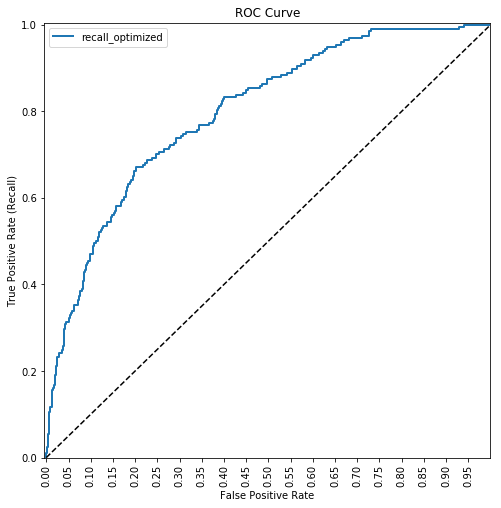

In [39]:
fpr, tpr, auc_thresholds = roc_curve(y_real, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [40]:
y = val_labels[:,1][val_labels[:,1]>0]
yhat = val_outputs[:,1][val_labels[:,1]>0]

In [41]:
RMSE = np.sqrt(np.mean((y - yhat)**2))
RMSE

1023.57996

In [42]:
y = np.abs(val_labels[:,1])
p = val_outputs[:,0]
f2 = val_outputs[:,1]
yhat = (1-p)*f2

In [43]:
RMSE = np.sqrt(np.mean((y - yhat)**2))
RMSE

920.2872